In [140]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  



In [141]:
# read the dataset
data = pd.read_csv("StudentsPerformance.csv")

In [142]:
# Data pre-processing
# to check the detail of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [143]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [144]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [145]:
data.shape

(1000, 8)

In [146]:
# transform all the data including string format into the numerical form
def string2int(df,feature):
    str2label = dict(zip(sorted(list(set(df[feature]))), range(0, len(set(df[feature])))))
    df[feature] = df[feature].map(str2label)

In [147]:
string2int(data,'gender')
string2int(data,'race/ethnicity')
string2int(data,'parental level of education')
string2int(data,'lunch')
string2int(data,'test preparation course')

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null int64
race/ethnicity                 1000 non-null int64
parental level of education    1000 non-null int64
lunch                          1000 non-null int64
test preparation course        1000 non-null int64
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(8)
memory usage: 62.6 KB


In [149]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [150]:
data.columns = data.columns.str.replace(" ","_")


In [151]:
data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [152]:
# data normalization: to normalize the data into the range between 0 and 1. (将分数特征归一化)
mms = MinMaxScaler()
dt = data.copy()
dt[['math_score','reading_score','writing_score']] = mms.fit_transform(data[['math_score','reading_score','writing_score']])

In [153]:
dt.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,1,1,1,1,0.72,0.662651,0.711111
1,0,2,4,1,0,0.69,0.879518,0.866667
2,0,1,3,1,1,0.90,0.939759,0.922222
3,1,0,0,0,1,0.47,0.481928,0.377778
4,1,2,4,1,1,0.76,0.734940,0.722222


In [154]:
# find the mean of 3 different scores.
dt.math_score.mean()

0.660890000000001

In [155]:
dt.reading_score.mean()

0.6285421686746991

In [156]:
dt.writing_score.mean()

0.645044444444444

In [157]:
#separate the data into two genders which are 0 and 1, which represents female and male. 
dt.groupby("gender").mean()


,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
gender,,,,,,,
0,2.175676,2.482625,0.635135,0.644788,0.636332,0.669977,0.694080
1,2.172199,2.489627,0.655602,0.639004,0.687282,0.584012,0.592347


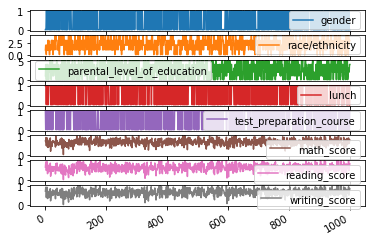

<Figure size 7200x720 with 0 Axes>

In [158]:
dt.plot(subplots=True) 
fig = plt.figure(figsize=(100,10))
#fig.tight_layout()
#plt.subplots_adjust(wspace =0.3, hspace =0.1)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.9, hspace=0.9)
plt.show()

[]

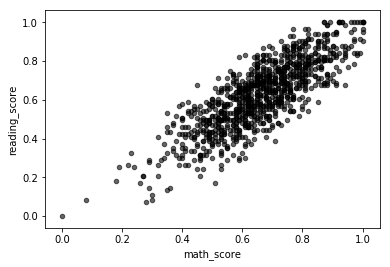

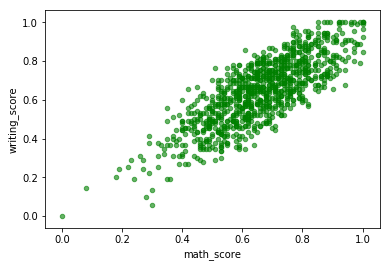

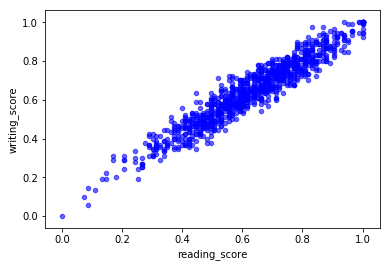

In [159]:
dt.plot(kind="scatter",x="math_score",y="reading_score",alpha=0.6,color="black")
dt.plot(kind="scatter",x="math_score",y="writing_score",alpha=0.6,color="green")
dt.plot(kind="scatter",x="reading_score",y="writing_score",alpha=0.6,color="blue")
plt.plot()

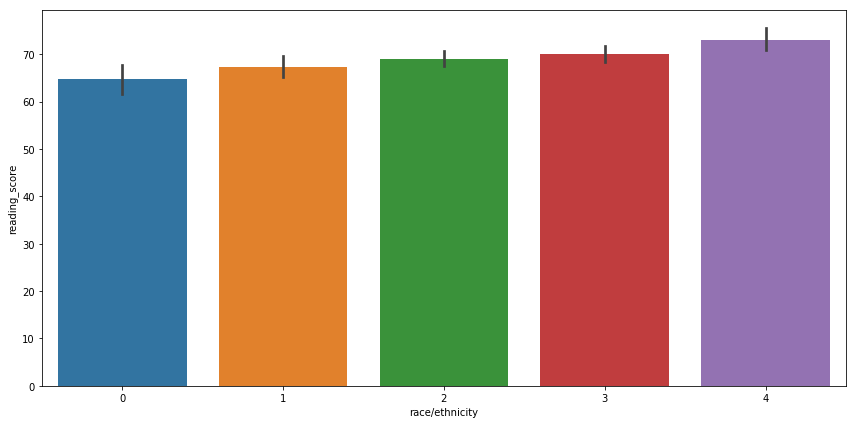

In [160]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'race/ethnicity', y = 'reading_score', data = data)
plt.tight_layout()

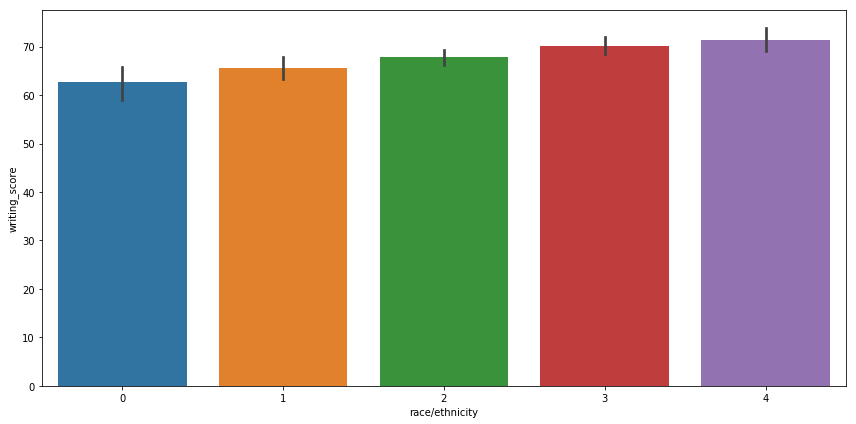

In [161]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'race/ethnicity', y = 'writing_score', data = data)
plt.tight_layout()

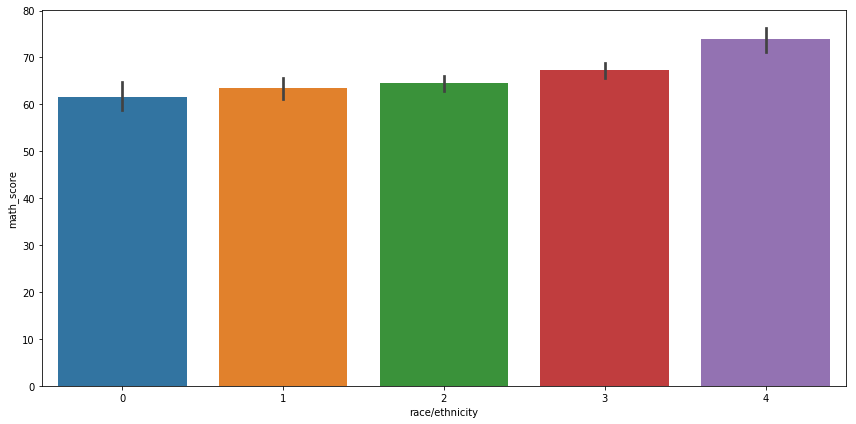

In [162]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'race/ethnicity', y = 'math_score', data = data)
plt.tight_layout()

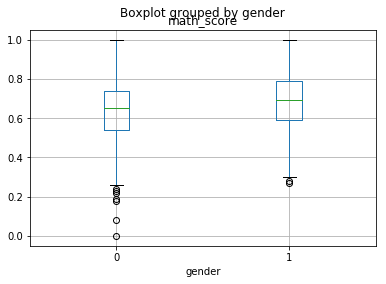

In [163]:
dt.boxplot(column="math_score",by="gender")

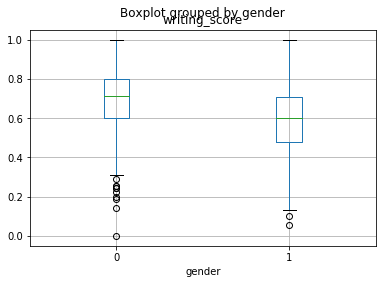

In [164]:
dt.boxplot(column="writing_score",by="gender")

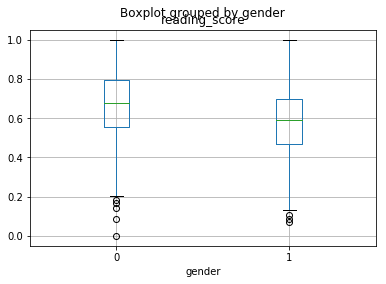

In [165]:
dt.boxplot(column="reading_score",by="gender")

In [166]:
# set 10% of data as trainning set.
train_x = dt.copy()
test_x = train_x.sample(n=100)
train_x = pd.concat([train_x, test_x], axis=0)
train_x.drop_duplicates(keep=False, inplace=True)

In [167]:
# identify and distinguish the feature columns and the prediction targets
train_y = train_x.pop('gender')

In [168]:
# transform into array form
feature = [value for value in train_x.columns.values]
train_x = np.array(train_x[feature])
train_y = np.array(train_y)

In [169]:
#Trainning part
#9-folder cross-validation by using the trainning set, and save the max of the trainning set and test set. 
#Output the prediction accuracy and average accuracy in each fold. 
#将训练集使用9折交叉验证，并保留得分最高的训练集与验证集，输出每折预测准确率与平均准确率
validation_score =[]
n_splits=9
skf = StratifiedKFold(n_splits,random_state=2012,shuffle=True)
for index,(train_index,valid_index) in enumerate(skf.split(train_x,train_y)):
    X_train,X_valid,y_train,y_valid = train_x[train_index],train_x[valid_index],train_y[train_index],train_y[valid_index]
    knn = KNeighborsClassifier(n_neighbors= 7, weights= 'distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_valid)
    validation_score.append(metrics.accuracy_score(y_valid, y_pred))
    if metrics.accuracy_score(y_valid, y_pred) == max(validation_score):
        X,x,Y,y=X_train,X_valid,y_train,y_valid
print(validation_score)
print(np.mean(validation_score))

[0.6336633663366337, 0.48514851485148514, 0.67, 0.69, 0.69, 0.63, 0.64, 0.6363636363636364, 0.5858585858585859]
0.6290037892678156


In [170]:
# Evaluation
test_y = test_x.pop('gender')

In [171]:
# Verify the results on the test set
knn.fit(X, Y)
y_pred = knn.predict(np.array(test_x))
print(metrics.accuracy_score(np.array(test_y), y_pred))

0.67


In [172]:
data1 = data.copy()
label = data1.pop("gender")
data1 = np.array(data1)
pca = PCA(n_components=2)  # Load the PCA algorithm, set the number of principal components to 2 after reducting dimension.
reduced_x = pca.fit_transform(data1)  # Dimension reduction of the sample.

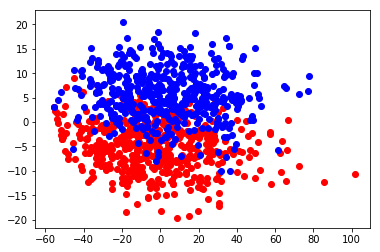

<Figure size 720x720 with 0 Axes>

In [173]:
red_x, red_y = [], []
blue_x, blue_y = [], []
 
for i in range(len(reduced_x)):
    if label[i] == 0:
        red_x.append(reduced_x[i][0])
        red_y.append(reduced_x[i][1])
    elif label[i] == 1:
        blue_x.append(reduced_x[i][0])
        blue_y.append(reduced_x[i][1])
    
# Visualize the graph (可视化)
plt.scatter(red_x, red_y, c='r')
plt.scatter(blue_x, blue_y, c='b')
plt.figure(figsize=(10,10))
plt.show()

In [174]:
data1 = data.copy()
label = data1.pop("gender")
data1 = np.array(data1)
pca = PCA(n_components=3)  # Load the PCA algorithm, set the number of principal components to 3 after reducting dimension.
reduced_x = pca.fit_transform(data1)  # Dimension reduction of the sample.
reduced_x = pd.DataFrame(reduced_x)

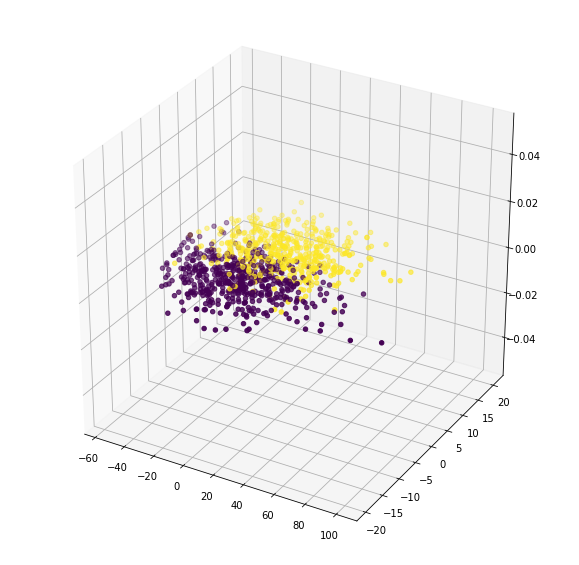

In [175]:
cValue = label
cValue.replace({0:'r',1:'g',2:'b',3:'y',4:'k'}).values
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(reduced_x.iloc[:,0].values,reduced_x.iloc[:,1].values,c=cValue.values)  
plt.show()

In [176]:
train_x = dt.copy()
test_x = train_x.sample(n=100)
train_x = pd.concat([train_x, test_x], axis=0)
train_x.drop_duplicates(keep=False, inplace=True)

In [177]:
train_y = train_x.pop('race/ethnicity')

In [178]:
feature = [value for value in train_x.columns.values]
train_x = np.array(train_x[feature])
train_y = np.array(train_y)

In [179]:
validation_score =[]
n_splits=9
skf = StratifiedKFold(n_splits,random_state=2012,shuffle=True)
for index,(train_index,valid_index) in enumerate(skf.split(train_x,train_y)):
    X_train,X_valid,y_train,y_valid = train_x[train_index],train_x[valid_index],train_y[train_index],train_y[valid_index]
    knn = KNeighborsClassifier(n_neighbors= 7, weights= 'distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_valid)
    validation_score.append(metrics.accuracy_score(y_valid, y_pred))
    if metrics.accuracy_score(y_valid, y_pred) == max(validation_score):
        X,x,Y,y=X_train,X_valid,y_train,y_valid
print(validation_score)
print(np.mean(validation_score))

[0.20588235294117646, 0.21568627450980393, 0.28431372549019607, 0.30392156862745096, 0.2376237623762376, 0.29, 0.23711340206185566, 0.30927835051546393, 0.28865979381443296]
0.2636088033707353


In [180]:
test_y = test_x.pop('race/ethnicity')

In [181]:
knn.fit(X, Y)
y_pred = knn.predict(np.array(test_x))
print(metrics.accuracy_score(np.array(test_y), y_pred))

0.21


In [182]:
data1 = data.copy()
label = data1.pop("race/ethnicity")
data1 = np.array(data1)
pca = PCA(n_components=2)  # Load the PCA algorithm, set the number of principal components to 2 after reducting dimension.
reduced_x = pca.fit_transform(data1)  # Dimension reduction of the sample

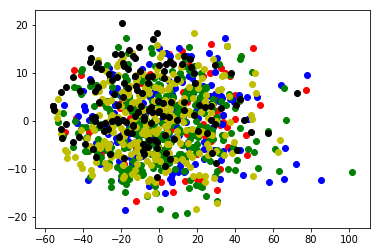

<Figure size 720x720 with 0 Axes>

In [183]:
red_x, red_y = [], []
blue_x, blue_y = [], []
green_x, green_y = [], []
yellow_x, yellow_y = [], []
black_x, black_y = [], []
 
for i in range(len(reduced_x)):
    if label[i] == 0:
        red_x.append(reduced_x[i][0])
        red_y.append(reduced_x[i][1])
    elif label[i] == 1:
        blue_x.append(reduced_x[i][0])
        blue_y.append(reduced_x[i][1])
    elif label[i] == 2:
        green_x.append(reduced_x[i][0])
        green_y.append(reduced_x[i][1])
    elif label[i] == 3:
        yellow_x.append(reduced_x[i][0])
        yellow_y.append(reduced_x[i][1])
    else:
        black_x.append(reduced_x[i][0])
        black_y.append(reduced_x[i][1])
# 可视化
plt.scatter(red_x, red_y, c='r')
plt.scatter(blue_x, blue_y, c='b')
plt.scatter(green_x, green_y, c='g')
plt.scatter(yellow_x, yellow_y, c='y')
plt.scatter(black_x, black_y, c='k')
plt.figure(figsize=(10,10))
plt.show()

In [184]:
data2 = data.copy()
labe2 = data2.pop("race/ethnicity")
data2 = np.array(data2)
pca = PCA(n_components=3)  # Load the PCA algorithm, set the number of principal components to 3 after reducting dimension.
reduced_x = pca.fit_transform(data2)  # Dimension reduction of the sample
reduced_x = pd.DataFrame(reduced_x)

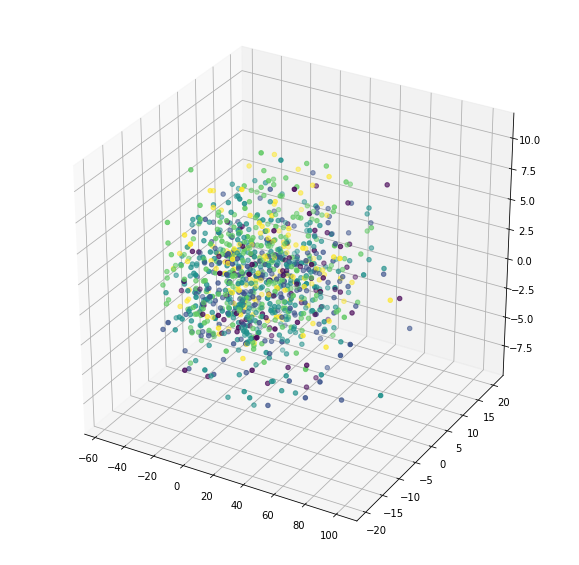

In [185]:
cValue = labe2
cValue.replace({0:'r',1:'g',2:'b',3:'y',4:'k'}).values
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(reduced_x.iloc[:,0].values,reduced_x.iloc[:,1].values,reduced_x.iloc[:,2].values,c=cValue.values)  
plt.show()

